# Some examples of how to use DINEOFrun

In [1]:
push!(LOAD_PATH,"C:/JMB/DINEOF.jl/src","."); using DINEOF
using PyPlot
using LinearAlgebra
using Arpack
using Statistics
using Optim

┌ Info: Recompiling stale cache file C:\Users\jmbeckers\.julia\compiled\v1.2\DINEOF.ji for DINEOF [top-level]
└ @ Base loading.jl:1240


In [2]:
?DINEOFrun

search: DINEOFrun DINEOF_errormap DINEOF_musquare



```
XA,offset,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(X,whichgroups=[ ones(Int32,ndims(X)-1)...,2];
minimumcoverage=(0.1, 0.1),
cvmask="Automatic",
cvfraction=0.01,
cvmethod="Random",
maxbubblesize=0.01*[size(X)...],
dimensionsforcopy=[zeros(Int32,ndims(X)-1)...,1],
errormap=true,
musquare=0,
restart=[],
keepsvdcvrestart=true,
eofmax=size(X)[2]-1,
eofstart=1,
dineofmaxiter=10,
dineoftol=0.001,
svdmeth="svd",
svdtol=0.000001,
filter="None",
filterintensity=1.0,
filterrepetitions=1)
```

Provides a DINEOF reconstruction of an N-dimensional array `X`. Missing points are identified with NaN values. Since the input arrays can have more than 2 dimensions, you have to specify which dimensions need to be collapsed into one. To do so the array `whichgroups` specifies to which collapsed dimensions (1 or 2) each dimension is collapsed into. The output is the filtered field. If it is to be merged with the original data, you can use DINEOF_fuse.

# Input:

  * `X`: The N-dimensional array containing the data. Missing points are NaN
  * `whichgroups`: array of "1" or "2" of size ndims(X). for each dimension it tells if it goes into dimensions 1 or 2 for the SVD decomposition. Default is last dimension is group 2 only

# Optional keyword inputs with their defaults:

  * `minimumcoverage=(0.1, 0.1)` : The minimum coverage in each dimension for the collapsed matrix. If the coverage is below the threshold, the line or colums is taken out
  * `cvmask="Automatic"` : You can provide your own cross-validation mask. In that case cvmask is a boolean array of the same size as X with "true" on points for crossvalidation. If "Automatic", DINEOF will create the mask based on the next parameters
  * `cvfraction=0.01` : fraction of points to be used for cross validation (fraction is with respect to valid points)

  * `cvmethod="Random"` : method to create the cross validation mask. "Random" "Bubbles" or "CopyMask": If "Bubbles" are created the maximum size in each direction is specified in maxbubblesize. If "CopyMask" is used, dimensionsforcopy specifies along which dimensions tha NaN pattern of X can be copied to create a mask
  * `maxbubblesize=0.01*[size(X)...]` : maximum size of the bubbles in each direction

*	`dimensionsforcopy=[zeros(Int32,ndims(X)-1),1]`: array of 0 and 1. For each direction is indicates if one can move a mask of NaNs from X along that direction.

*	`errormap=true` : if false, error map returned is []

*	`musquare=0` : You can provide your own estimate of musquare to be used for OI error map calculations. If 0, DINEOF will do the estimate

*	`restart=[]` : You can provide an array of the same size of X to fill in the first guess in the missing points. If not provided, the matrix is filled randomly with a variance of the present data

  * `keepsvdcvrestart=true` : goes back to the best estimate of the reconstruction during final EOF decomposition

*	`eofmax=size(X)[2]-1`: maximum number of EOFs 

*	`eofstart=1` : number of EOFs to start with in the search of the optimum. Can be larger than 1, particularly if you had a good restart matrix

*	`dineofmaxiter=10` : Maximum Number of iterations  USV=X, X=fillfrom(USV) 

*	`dineoftol=0.001` : relative change during iterations below which one stops

*	`svdmeth="svd"` : work with SVD or with eigenvalues of X'X ("eig")

*	`svdtol=0.000001` : tolerance during svd decomposition of filled matrix (svds or eig)

*	`filter="None"` : filter to be applied to dimension 2. Note that this is the dimension in the innermost svd decomposition which might be dimension 1 of the outermost call since a transpose is performed if M<N

*	`filterintensity=1.0` : filter intensity

*	`filterrepetitions=1` : filter repetitions

# Output:

  * `XA` : the analysed (filtered) data filled in in places where enough data where available (see coverage parameter) including the offset: XA=offset+U S V'
  * `offset` : the value that was subtracted from the original data to center them
  * `U` : array of U arrays. To get access to mode 2: U[2][1]
  * `S`: array of singular values. use diagm(S) if you want to work with matrices
  * `V` : array of V arrays: To get mode 3: V[3][1]
  * `cvEOF` : cross validation estimator (variance of misfit at cross validation points)
  * `errmap` : array of the same structure as X containing the error variance estimate of the reconstruction XA
  * `musquare` : the value of mu^2 used for the OI interpretation leading to error maps


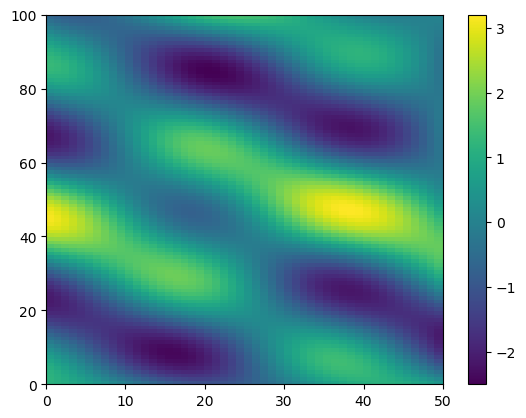

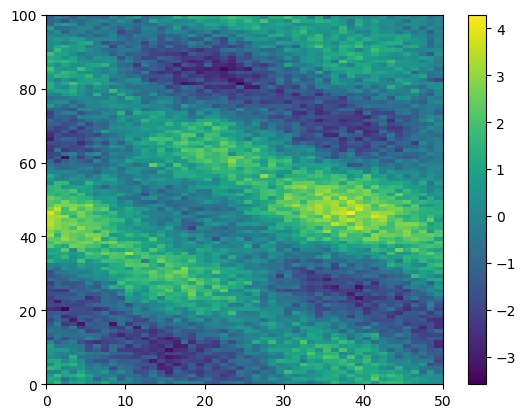

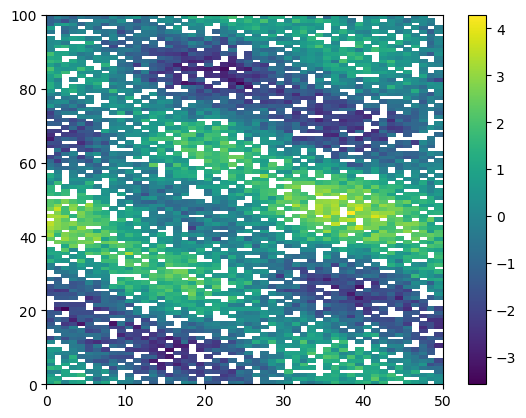

(PyObject <matplotlib.collections.PolyCollection object at 0x00000000342C3908>, PyObject <matplotlib.colorbar.Colorbar object at 0x00000000344525C0>)

In [3]:
NX=100
NT=50
X=zeros(Float64,NX,NT)
for i=1:NX
    for j=1:NT
        X[i,j]=sin(i/6)*cos(j/6)+cos((i+j)/7)-sin((i/10))+exp(-.0001*(i-40)*(i-40))
    end
end
X=X.-mean(X)
pcolor(X),colorbar()
figure()
X=X+0.5*randn(NX,NT)
pcolor(X),colorbar()
figure()
ntot=prod(size(X))
for i=1:1300
    X[mod(rand(Int),ntot)+1]=NaN
end
pcolor(X),colorbar()

Raw data variance and mean: 1.8272868002901295 and -0.002785219869790112
Number of missing points (including possible masks): 1165 out of 5000
Number of data points before elimination of low coverage regions is 3835 and cv fraction 0.010691003911342895
Number of data points after elimination of low coverage regions is 3835 and cv fraction 0.010691003911342895
(mean(X2D), meanmatrix, meanmiss) = (-0.000262983656747906, 3.7055683742378105e-17, -0.00112868522209413)
svds! matrix size: (100, 50)
svds!: variance and mean of the entry matrix: 1.8108064794632472 , -0.000262983656747906 ; intial variance at points to fill in: 1.7565697281495858 
Convergence for 1 eofs, relative change 0.000510074079410883 after 8 iterations
Eof loop 1 with mean squared misfit: 0.856625299881507 
Convergence for 2 eofs, relative change 0.0008797048161125465 after 8 iterations
Eof loop 2 with mean squared misfit: 0.6622295783952862 
Convergence for 3 eofs, relative change 0.0005438554394584694 after 9 iterations

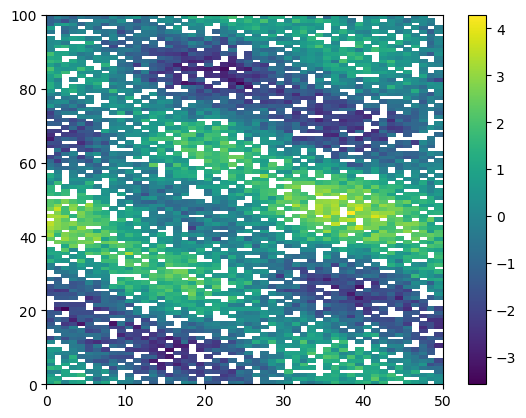

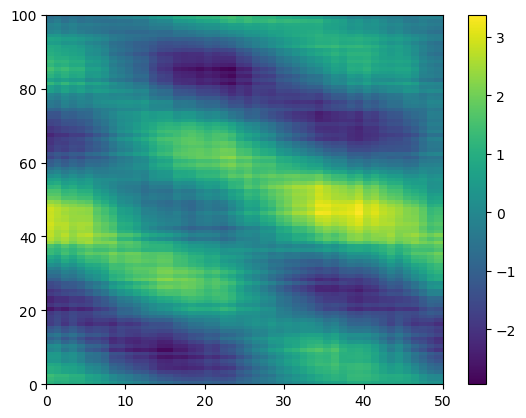

 24.855074 seconds (44.52 M allocations: 2.204 GiB, 6.46% gc time)


(PyObject <matplotlib.collections.PolyCollection object at 0x000000003B307CF8>, PyObject <matplotlib.colorbar.Colorbar object at 0x00000000417BAC88>)

In [4]:
@time XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()

Be more severe on admissible coverage in one direction

Raw data variance and mean: 1.8272868002901295 and -0.002785219869790112
Number of missing points (including possible masks): 1165 out of 5000
Number of data points before elimination of low coverage regions is 3835 and cv fraction 0.010430247718383311
Number of data points after elimination of low coverage regions is 1281 and cv fraction 0.00702576112412178
(mean(X2D), meanmatrix, meanmiss) = (-0.013550661854149975, 0.0057835930515811994, -0.07808002183618026)
svds! matrix size: (50, 31)
svds!: variance and mean of the entry matrix: 1.954105725561669 , -0.013550661854149975 ; intial variance at points to fill in: 1.9432137909799445 
Convergence for 1 eofs, relative change 0.0006573183258034442 after 8 iterations
Eof loop 1 with mean squared misfit: 0.8664596845053869 
Convergence for 2 eofs, relative change 0.0008534802270190114 after 8 iterations
Eof loop 2 with mean squared misfit: 0.7728740664661802 
Convergence for 3 eofs, relative change 0.0007592531517647831 after 8 iterations
E

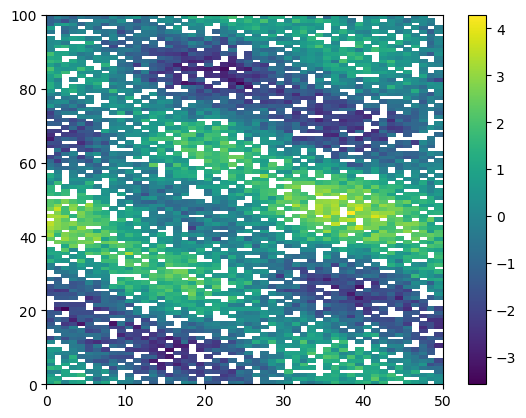

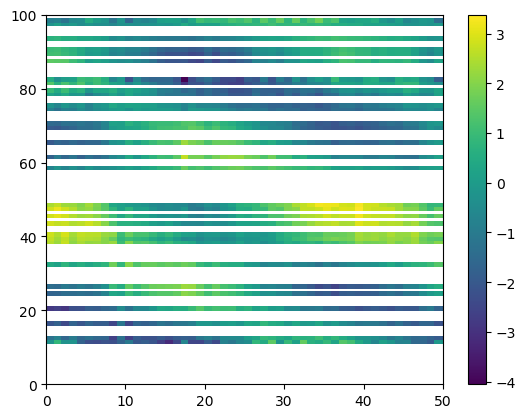


(size(U), size((UG[1])[1])) = ((100, 4), (100,))


(PyObject <matplotlib.collections.PolyCollection object at 0x0000000033F92A58>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000003411FB38>)

In [5]:
XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X;minimumcoverage=(0.8,0.1))
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()

Here forcing inversion of dimensions only forces internal transpose

Raw data variance and mean: 1.8272868002901295 and -0.002785219869790112
Number of missing points (including possible masks): 1165 out of 5000
Number of data points before elimination of low coverage regions is 3835 and cv fraction 0.010691003911342895
Number of data points after elimination of low coverage regions is 3835 and cv fraction 0.010691003911342895
(mean(X2D), meanmatrix, meanmiss) = (0.013629927441123527, 3.7055683742378105e-17, 0.058497542665765984)
svds! matrix size: (100, 50)
svds!: variance and mean of the entry matrix: 1.8123439644346868 , 0.013629927441123527 ; intial variance at points to fill in: 1.7625557416914845 


┌ Warning: You should subtract a mean value from your data
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:105


Convergence for 1 eofs, relative change 0.0004912251448145554 after 8 iterations
Eof loop 1 with mean squared misfit: 1.2945976938819515 
Convergence for 2 eofs, relative change 0.0008559650415834475 after 8 iterations
Eof loop 2 with mean squared misfit: 0.6737058828269435 
Convergence for 3 eofs, relative change 0.0009777377074528196 after 8 iterations
Eof loop 3 with mean squared misfit: 0.30517641857971556 
Eof loop 4 with mean squared misfit: 0.3109155360709254 
Eof loop 5 with mean squared misfit: 0.34152112009755387 
Eof loop 6 with mean squared misfit: 0.3917653932757983 
Eof loop 7 with mean squared misfit: 0.4820087648027156 


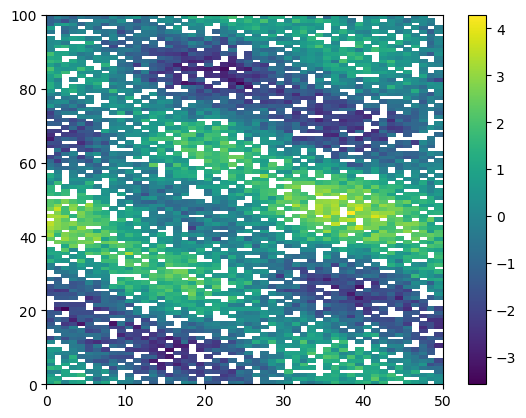

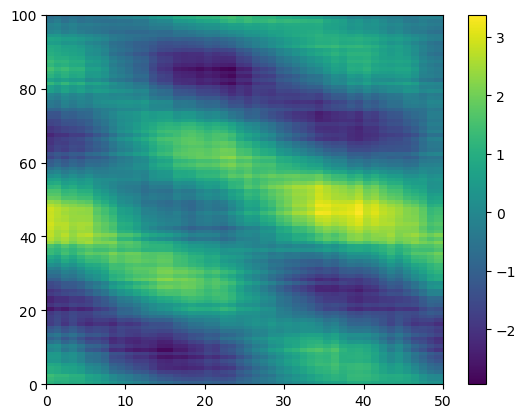

Cross validation value (mean squared misfit): 0.30517641857971556 for 3 EOFs
Estimation for musquare based on DeRozier type of analysis: 0.22705458057234304
Estimation of mean error variance of reconstuctions: -0.07812183800737252 
Explained variance  87.27506308756958 percent
musquare optimization: Both OI-EOF error and CV coherence
tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.113527, 22.705458]
 * Minimizer: 2.638238e+00
 * Minimum: 1.267708e+00
 * Iterations: 8
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): true
 * Objective Function Calls: 9
CV estimator from EOF 0.30517641857971556 is now 0.2626004933677278 if OI is used
Optimal musquare is 2.6382378580126598
Relative error on reconstruction 9.393901764283596e-5, relative error on CV estimator 0.019463737761290376
The two criteria to compare OI and EOF are: reconstruction 0.4696950882141798, closest CV 0.7980132482129054
Estimated musquare 0.22705458057

(PyObject <matplotlib.collections.PolyCollection object at 0x0000000041A88A90>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000041D9CA20>)

In [6]:
XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1))
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()

Limit number of eofs to 2

Raw data variance and mean: 1.8272868002901295 and -0.002785219869790112
Number of missing points (including possible masks): 1165 out of 5000
Number of data points before elimination of low coverage regions is 3835 and cv fraction 0.010951760104302478
Number of data points after elimination of low coverage regions is 3835 and cv fraction 0.010951760104302478
(mean(X2D), meanmatrix, meanmiss) = (0.0004081842426375999, 3.7055683742378105e-17, 0.0017518637023071178)
svds! matrix size: (100, 50)
svds!: variance and mean of the entry matrix: 1.8241978765055191 , 0.0004081842426375999 ; intial variance at points to fill in: 1.8140317196331386 
Convergence for 1 eofs, relative change 0.00048008401401726205 after 8 iterations
Eof loop 1 with mean squared misfit: 1.1214858764779034 

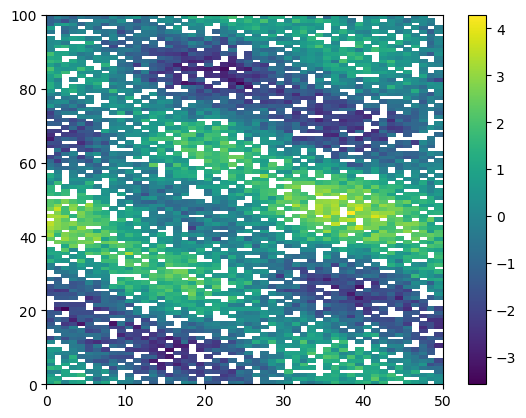

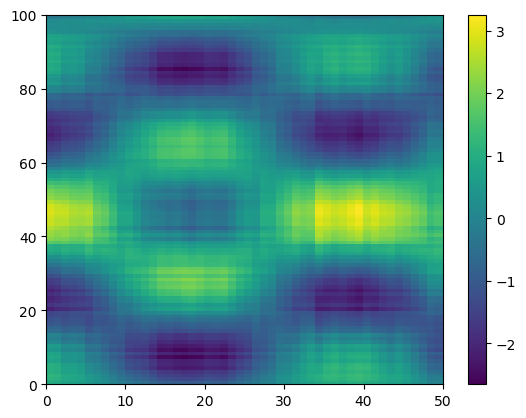


Convergence for 2 eofs, relative change 0.0008933973460871026 after 8 iterations
Eof loop 2 with mean squared misfit: 0.6303548492313323 
Cross validation value (mean squared misfit): 0.6303548492313323 for 2 EOFs
Estimation for musquare based on DeRozier type of analysis: 0.4688509927593873
Estimation of mean error variance of reconstuctions: -0.16150385647194504 
Explained variance  73.65459718391077 percent
musquare optimization: Both OI-EOF error and CV coherence
tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.234425, 46.885099]
 * Minimizer: 9.171417e-01
 * Minimum: 6.447332e-01
 * Iterations: 11
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): true
 * Objective Function Calls: 12
CV estimator from EOF 0.6303548492313323 is now 0.5544308144132489 if OI is used
Optimal musquare is 0.917141735049612
Relative error on reconstruction 7.084821026819215e-6, relative error on CV estimator 0.014507359159762232
The 

(PyObject <matplotlib.collections.PolyCollection object at 0x0000000033F61FD0>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000041989668>)

In [7]:
@time XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1),eofmax=2)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()


Check if restart improves time

Raw data variance and mean: 1.8272868002901295 and -0.002785219869790112
Number of missing points (including possible masks): 1165 out of 5000
Number of data points before elimination of low coverage regions is 3835 and cv fraction 0.010691003911342895
Using restart matrix
mean(restart2D[.!(isnan.(restart2D))]) = -0.003192188332698265
mean(restart2D[.!(isnan.(restart2D))]) = -0.003192188332698265
mean(restart2D[.!(isnan.(restart2D))]) = -0.0031921883326982764
Number of data points after elimination of low coverage regions is 3835 and cv fraction 0.010691003911342895
(mean(X2D), meanmatrix, meanmiss) = (-0.003755883219831003, 3.7055683742378105e-17, -0.01611967047137787)
svds! matrix size: (100, 50)
svds!: variance and mean of the entry matrix: 1.7035455911464734 , -0.003755883219831003 ; intial variance at points to fill in: 1.2962684281480836 
Convergence for 1 eofs, relative change 0.0006456129719114524 after 6 iterations
Eof loop 1 with mean squared misfit: 0.7375138382014775 
Conve

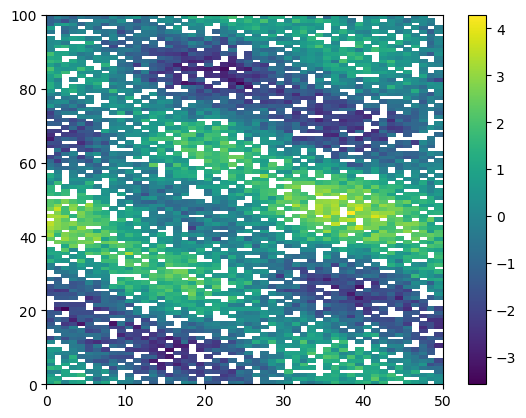

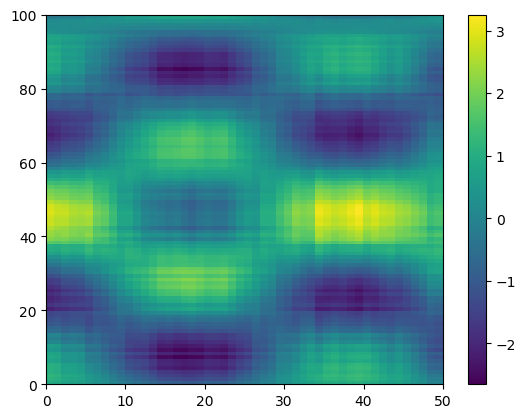


tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.234409, 46.881708]
 * Minimizer: 2.555446e-01
 * Minimum: 1.919983e-01
 * Iterations: 15
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): false
 * Objective Function Calls: 16
CV estimator from EOF 0.36881039811256566 is now 0.343759588843969 if OI is used
Optimal musquare is 0.2555446123839478
Relative error on reconstruction 5.683854181492502e-7, relative error on CV estimator 0.004613570982750794
The two criteria to compare OI and EOF are: reconstruction 0.0028419270907462514, closest CV 0.18915641029278255
Estimated musquare 0.4688170822564734 was inflated by factor 0.5450838334515898 into 0.2555446123839478
This optimal value provides OI interpolation CV estimator 0.343759588843969
Mean error variance of reconstruction: 0.006641601307067468 
Internally final matrix was transposed for SVD analysis
(size(U), size((UG[1])[1])) = ((50, 2), (50,))
  2.126409 second

(PyObject <matplotlib.collections.PolyCollection object at 0x0000000034203A58>, PyObject <matplotlib.colorbar.Colorbar object at 0x00000000421C49E8>)

In [8]:
@time XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1),eofmax=2,restart=XF)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()


starting with the right number of EOFs should lead to 1 iteration

Raw data variance and mean: 1.8272868002901295 and -0.002785219869790112
Number of missing points (including possible masks): 1165 out of 5000
Number of data points before elimination of low coverage regions is 3835 and cv fraction 0.010691003911342895
Using restart matrix
mean(restart2D[.!(isnan.(restart2D))]) = -0.003175114529278562
mean(restart2D[.!(isnan.(restart2D))]) = -0.003175114529278562
mean(restart2D[.!(isnan.(restart2D))]) = -0.003175114529278574
Number of data points after elimination of low coverage regions is 3835 and cv fraction 0.010691003911342895
(mean(X2D), meanmatrix, meanmiss) = (-0.003744794609240131, 3.7055683742378105e-17, -0.016072079867983542)
svds! matrix size: (100, 50)
svds!: variance and mean of the entry matrix: 1.7035673874797295 , -0.003744794609240131 ; intial variance at points to fill in: 1.2963622297231308 
Convergence for 2 eofs, relative change 0.0004811876620436877 after 2 iterations
Eof loop 2 with mean squared misfit: 0.5796696613902284 
Cross

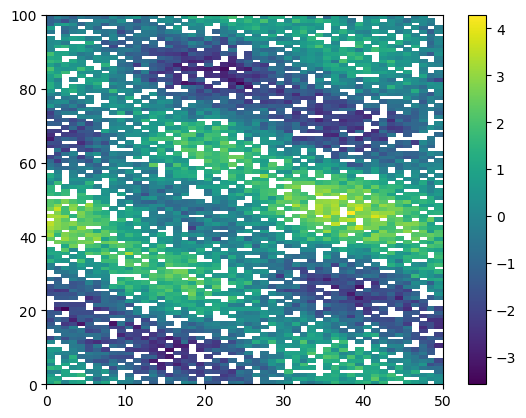

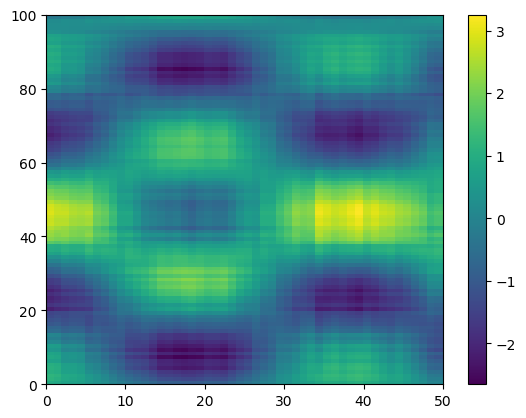

tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.234408, 46.881605]
 * Minimizer: 2.555440e-01
 * Minimum: 1.175053e-01
 * Iterations: 15
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): false
 * Objective Function Calls: 16
CV estimator from EOF 0.5796696613902284 is now 0.6103238514399469 if OI is used
Optimal musquare is 0.2555440491740424
Relative error on reconstruction 5.69564795681774e-7, relative error on CV estimator 0.002796523990071682
The two criteria to compare OI and EOF are: reconstruction 0.0028478239784088697, closest CV 0.11465748359293897
Estimated musquare 0.46881604900274093 was inflated by factor 0.5450838334515897 into 0.2555440491740424
This optimal value provides OI interpolation CV estimator 0.6103238514399469
Mean error variance of reconstruction: 0.0066416238561304184 
Internally final matrix was transposed for SVD analysis
(size(U), size((UG[1])[1])) = ((50, 2), (50,))
  0.112183 secon

(PyObject <matplotlib.collections.PolyCollection object at 0x00000000434C6FD0>, PyObject <matplotlib.colorbar.Colorbar object at 0x00000000437DCF60>)

In [9]:
@time XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1),eofstart=2,eofmax=2,restart=XF)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()


Can we force a certain number of EOFs, say 9 ?

Try without cross validation points and use 

Raw data variance and mean: 1.8272868002901295 and -0.002785219869790112
Number of missing points (including possible masks): 1165 out of 5000
Number of data points before elimination of low coverage regions is 3835 and cv fraction 0.0
Using restart matrix
mean(restart2D[.!(isnan.(restart2D))]) = -0.0031528622779878786
mean(restart2D[.!(isnan.(restart2D))]) = -0.0031528622779878786
mean(restart2D[.!(isnan.(restart2D))]) = -0.0031528622779879016
Number of data points after elimination of low coverage regions is 3835 and cv fraction 0.0
(mean(X2D), meanmatrix, meanmiss) = (-0.0037429778922580285, 3.7055683742378105e-17, -0.016064282799390813)
svds! matrix size: (100, 50)
svds!: variance and mean of the entry matrix: 1.7035678337429854 , -0.0037429778922580285 ; intial variance at points to fill in: 1.2963641894125277 
Convergence for 1 eofs, relative change 0.0006417318458818849 after 6 iterations
Eof loop 1 with mean squared misfit: 1.0e37 
Convergence for 2 eofs, relative change 0.0009

┌ Warning: Initial Variance has been increased for filtered matrix  by factor 1.0016132065997942
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:295


musquare optimization: Both OI-EOF error and CV coherence


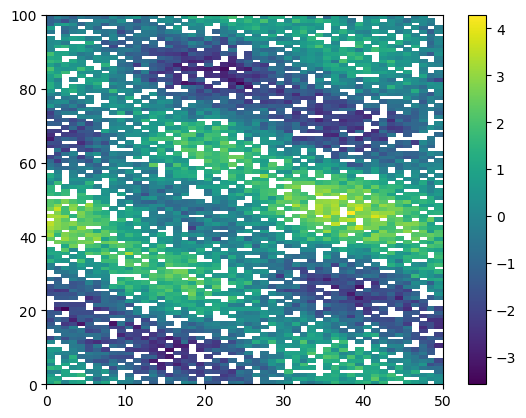

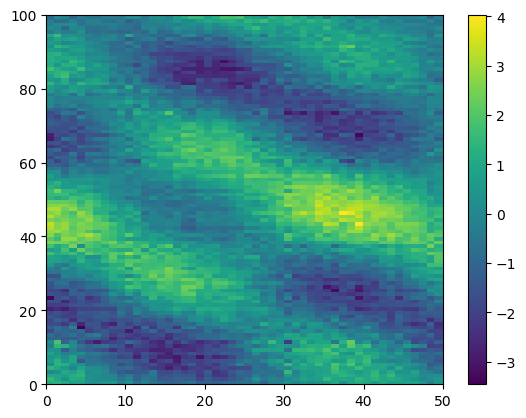

tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.068824, 13.764702]
 * Minimizer: 7.502917e-02
 * Minimum: 2.617743e-02
 * Iterations: 15
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): false
 * Objective Function Calls: 16
CV estimator from EOF 1.111111111111111e36 is now 1.0e36 if OI is used
Optimal musquare is 0.07502916553040635
Relative error on reconstruction 5.235486230741136e-6, relative error on CV estimator 0
The two criteria to compare OI and EOF are: reconstruction 0.02617743115370568, closest CV 0
Estimated musquare 0.13764702037722398 was inflated by factor 0.5450838334515898 into 0.07502916553040635
This optimal value provides OI interpolation CV estimator 1.0e36
Mean error variance of reconstruction: 0.008894757779322221 
Internally final matrix was transposed for SVD analysis
(size(U), size((UG[1])[1])) = ((50, 9), (50,))
  1.221008 seconds (2.60 M allocations: 252.286 MiB, 8.57% gc time)


(PyObject <matplotlib.collections.PolyCollection object at 0x0000000033C0A898>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000004381C828>)

In [10]:
@time XF,xmean,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1),cvfraction=0.0,eofmax=9,restart=XF)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF),colorbar()

In [11]:
SG

9-element Array{Float64,1}:
 68.00208859226899 
 46.210743584174175
 34.874535270357896
 11.032676143147457
 10.099403541736617
  9.351281801225364
  9.215424417166599
  8.98938027946858 
  8.873147476493134